# Regresión lineal

En el mercado de smartphones, los dispositivos con mayor capacidad de almacenamiento suelen tener baterías mas duraderas. Modelar estos datos podría ayudar a estimar la duración de batería en función de su capacidad de almacenamiento, algo útil para los consumidores a la hora de elegir un nuevo disposivo. Sea X la capacidad de almacenamiento de los smartphones (en TB) e Y la duración de su batería en días, con densidad de probabilidad conjunta de la forma:



$$p_{xy}(x,y) = \frac{3}{4} \cdot 𝟙{[0 \leq y \leq 1 + x^2,   0 \leq x \leq 1]}$$

### Librerias

Para realizar este trabajo práctico, se utilizaron las siguientes librerias:

In [223]:
import numpy as np
import pandas as pd
from time import time 
import matplotlib.pyplot as plt
import sympy as sp

from numpy.random import rand

### Gráfico del soporte de la densidad conjunta

Para tener un primer acercamiento al problema, se decidió graficar el soporte de la densidad conjunta.

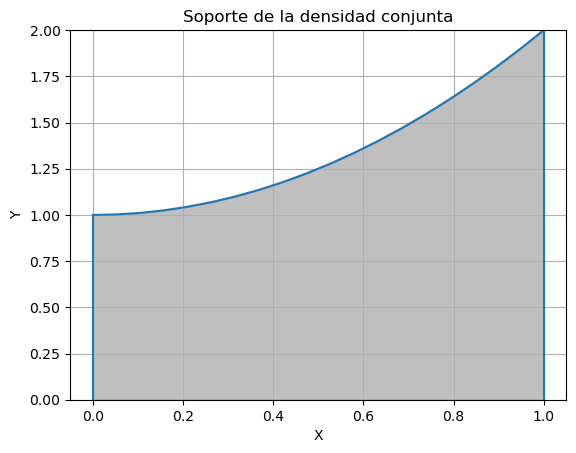

In [224]:
X = np.linspace(0, 1, 20)

Y = 1 + X**2

plt.plot(X, Y)
plt.grid(True)
plt.ylim(0, 2)
plt.vlines(x = 0, ymin = 0, ymax = min(Y))
plt.vlines(x = 1, ymin = 0, ymax = max(Y))
plt.title('Soporte de la densidad conjunta')
plt.fill_between(X, Y, color = 'gray', alpha = 0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Búsqueda de la esperanza condicional

### Cálculo de la Función de Probabilidad de X

Sabemos que la funcion de densidad dada se puede calcular como:

$P_{XY}(x,y) = P_X(x) \cdot P(Y|X) $

Como la función de Probabilidad $P(Y|X)$ calcula la probabilidad de Y en base a un valor de X ya dado, sigue una distribucion uniforme entre 0 y la cota superior delimitada por la curva $1 + x^2$. Entonces, la funcion de probabilidad obtenida es la siguiente:

$$P(Y|X) = \frac{1}{1+x^2}𝟙{[0 \leq y \leq 1 + x^2]}.$$



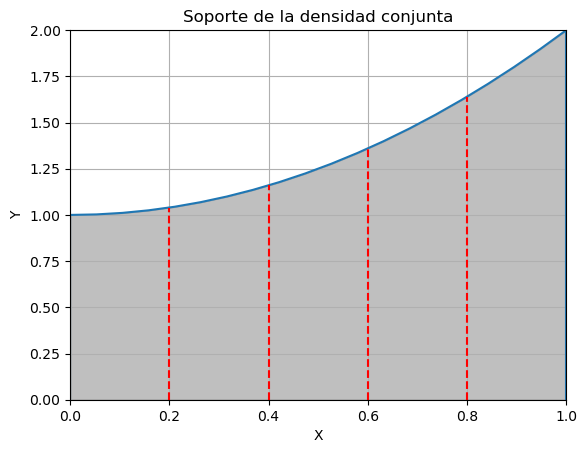

In [225]:
plt.plot(X, Y)
plt.grid(True)
plt.ylim(0, 2)
plt.xlim(0, 1)
plt.vlines(x = 0, ymin = 0, ymax = min(Y))
plt.vlines(x = 1, ymin = 0, ymax = max(Y))
plt.title('Soporte de la densidad conjunta')
plt.fill_between(X, Y, color = 'gray', alpha = 0.5)
plt.vlines(x = 0.2, ymin = 0, ymax = 1+0.2**2, color = 'red', linestyle = '--')
plt.vlines(x = 0.4, ymin = 0, ymax = 1+0.4**2, color = 'red', linestyle = '--')
plt.vlines(x = 0.6, ymin = 0, ymax = 1+0.6**2, color = 'red', linestyle = '--')
plt.vlines(x = 0.8, ymin = 0, ymax = 1+0.8**2, color = 'red', linestyle = '--')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Luego, la esperanza de una uniforme es su intervalo dividido 2:

$$ E[Y|X] = \frac{1+x^2}{2}. $$



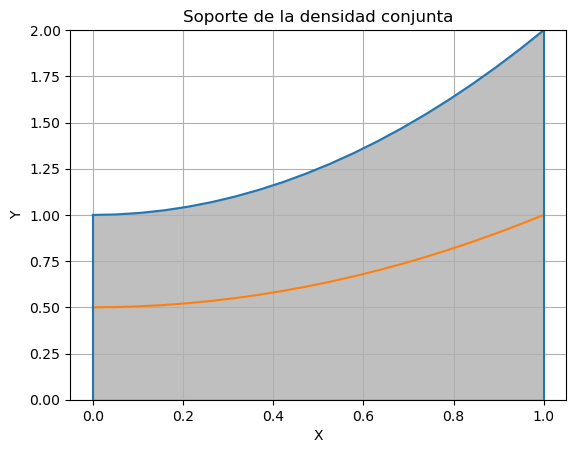

In [226]:
Yhat = (1 + X**2)/2

plt.plot(X, Y)
plt.plot(X, Yhat)
plt.grid(True)
plt.ylim(0, 2)
plt.vlines(x = 0, ymin = 0, ymax = min(Y))
plt.vlines(x = 1, ymin = 0, ymax = max(Y))
plt.title('Soporte de la densidad conjunta')
plt.fill_between(X, Y, color = 'gray', alpha = 0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Luego, se procedió a calcular el error bayesiano, el cual se define como 
$$ E[Var(Y|X)], $$

Sabiendo que Y|X sigue una distribucion uniforme, la varianza de una uniforme se calcula como

$$ Var(U) = \frac{(b-a)^2}{12}, $$

entonces,

$$ Var(Y|X) = \frac{(1+x^2)^2} {12}. $$

Luego, se calculó la esperanza de la varianza anteriormente calculada:

$$ E[Var(Y|X)] = E[\frac{(1+x^2)^2} {12}] = \frac{1}{12} \cdot E[1 + 2x^2 + x^4].$$

Los momentos de orden K de X se calculan como

$$E[X^k] =  \int_{0}^{1} X^k \cdot \frac{3}{4} \cdot (1+X^2) \cdot  dX = \frac{3}{4}\cdot(\frac{1}{k+1}+\frac{1}{k+3}).$$


In [227]:
k_lista = [1,2,3,4]
esperanzas = []

for k in k_lista:
    resultado = (3/4) * ((1/(k+1)) + (1/(k+3)))
    esperanzas.append(resultado)

error_bayesiano = (1/12) * (1 + 2*esperanzas[1] + esperanzas[3])
error_bayesiano



0.1714285714285714

Finalmente, el error bayesiano: 

$$ E[Var(Y|X)] \approx 0.171 $$

### Regresion lineal

Se propone un estimador de la forma

$$ \hat{Y} = aX+b, $$

el cual en este caso se utilizó el Estimador Lineal de Menor Error Cuadratico Medio (LMMSE):

$$\hat{Y}= \frac{Cov(X,Y)}{\sigma _X^2} \cdot (X - \mu _x) + \mu_y.$$

Tenemos que:

$$ \sigma_X^2 = E[X^2] - E^2[X] = 0.0836. $$



In [228]:
var_X = esperanzas[1] - esperanzas[0]**2 
var_X

0.08359375000000002

Luego, sabiendo que
$$ Cov(X,Y) = E[(X-\mu_x)\cdot(Y-\mu_y)] = E[XY] - E[Y] \cdot E[X], $$

se calculó primero la $E[Y]$ con la siguiente propiedad:

$$ E[Y] = E[E[Y|X]] $$
$$ E[Y] = E[\frac{1+X^2}{2}] $$ 
$$ E[Y] = \frac{1}{2} + \frac{1}{2}\cdot E[X^2] $$
$$ E[Y] = \frac{1}{2} + \frac{1}{2}\cdot \int_{0}^{1} X^k \cdot \frac{3}{4} \cdot (1+X^2) \cdot  dX $$

In [229]:
# Calcular E[Y]
E_X2 = esperanzas[1]  # E[X^2] ya calculado
E_Y = 0.5 + 0.5 * E_X2
E_Y


0.7

Luego, se procedió a calcular $E[XY]$:

$$ E[XY] = E[XE[Y|X]] = E[\frac{X+X^3}{2}] = \frac{1}{2}\cdot (E[X]+E[X^3]) $$

In [230]:
# Calcular E[X] y E[X^3]
E_X = (3/4) * ((1/(1+1)) + (1/(1+3)))
E_X3 = (3/4) * ((1/(3+1)) + (1/(3+3)))

# Calcular E[XY]
E_XY = 0.5 * (E_X + E_X3)
E_XY




0.4375

In [231]:
E_XY - E_X * E_Y


0.04375000000000001

Por lo tanto, la covarianza obtenida fue:

$$ Cov(X,Y) \approx 0.044, $$ 

otorgando el siguiente estimador:

$$ \hat{Y} = \frac{0.044}{0.0836} * (X - 0.5625) + 0.7 $$

$$ \hat{Y} \approx 0.5233X+0.4056 $$



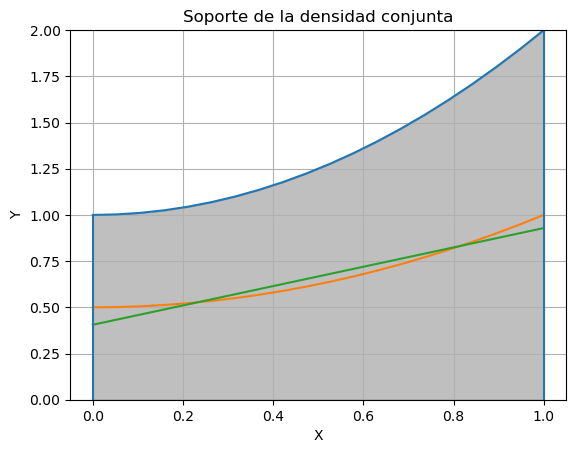

In [232]:
Ylmmse = 0.5233*X + 0.4056

plt.plot(X, Y)
plt.plot(X, Yhat)
plt.plot(X, Ylmmse )
plt.grid(True)
plt.ylim(0, 2)
plt.vlines(x = 0, ymin = 0, ymax = min(Y))
plt.vlines(x = 1, ymin = 0, ymax = max(Y))
plt.title('Soporte de la densidad conjunta')
plt.fill_between(X, Y, color = 'gray', alpha = 0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Generación de datasets

In [290]:
muestrasX = np.random.uniform(0, 1, 500).reshape(1, 500)

muestrasY = np.array([]).reshape(0, 1)

contadorY = 0

while contadorY < 500:
    auxiliar = np.random.uniform(0, 2)
    if auxiliar < 1 + muestrasX[0, contadorY]**2:
        muestrasY = np.append(muestrasY, auxiliar).reshape(-1, 1)
        contadorY += 1

print(muestrasX.shape)
print(muestrasY.shape)




(1, 500)
(500, 1)


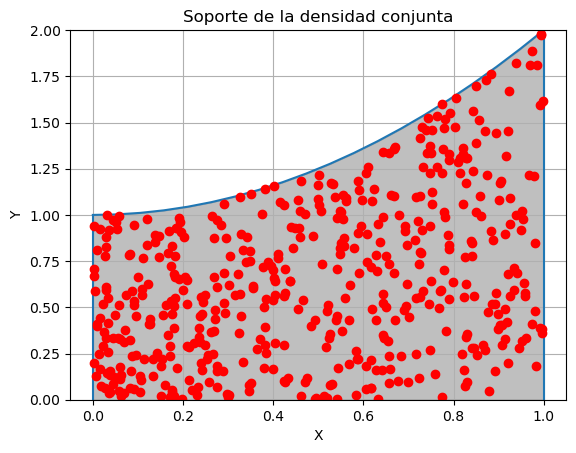

In [291]:

plt.plot(X, Y)
plt.grid(True)
plt.ylim(0, 2)
plt.vlines(x = 0, ymin = 0, ymax = min(Y))
plt.vlines(x = 1, ymin = 0, ymax = max(Y))
plt.title('Soporte de la densidad conjunta')
plt.fill_between(X, Y, color = 'gray', alpha = 0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(muestras[0], muestras[1], 'o', color = 'red')
plt.show()

## Regresion Lineal

In [ ]:
class regresion_lineal:
    def __init__(self):
        self.w = np.zeros((2,1))

    def fit(self, X, Y):

        X_entrenamiento = np.zeros((len(X.T), 2))

        for i in range(0, len(X.T)):
            X_entrenamiento[i, 0] = 1
            X_entrenamiento[i, 1] = X.T[i]

        self.w = np.linalg.inv(X_entrenamiento.T @ X_entrenamiento) @ X_entrenamiento.T @ Y

        return self.w

    def predict(self, X):

        X_prediccion = np.zeros((len(X.T), 2))

        for i in range(0, len(X.T)):
            X_prediccion[i, 0] = 1
            X_prediccion[i, 1] = X.T[i]

        return X_prediccion @ self.w
    
regresion_lineal = regresion_lineal(500)

regresion_lineal.fit(muestrasX, muestrasY)

regresor = regresion_lineal.predict(muestrasX)

        

C:\Users\Maxi\AppData\Local\Temp\ipykernel_30340\1861790631.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_entrenamiento[i, 1] = X.T[i]
C:\Users\Maxi\AppData\Local\Temp\ipykernel_30340\1861790631.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_prediccion[i, 1] = X.T[i]


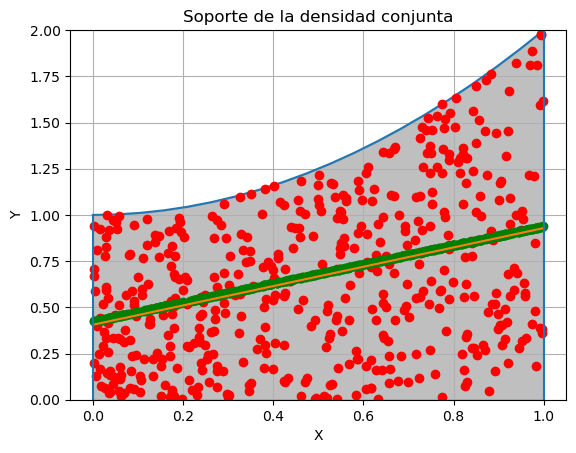

In [240]:
plt.plot(X, Y)
plt.grid(True)
plt.ylim(0, 2)
plt.plot(muestras[0], muestras[1], 'o', color = 'red')
plt.plot(muestrasX[0], regresor, 'o', color = 'green')
plt.plot(X, Ylmmse)
plt.vlines(x = 0, ymin = 0, ymax = min(Y))
plt.vlines(x = 1, ymin = 0, ymax = max(Y))
plt.title('Soporte de la densidad conjunta')
plt.fill_between(X, Y, color = 'gray', alpha = 0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Prediccion de bateria de 256 GB


In [242]:
bateria_256 = np.array([[256]])

regresor_256 = regresion_lineal.predict(bateria_256)
regresor_256
print(regresor_256)

[[132.35561041]]


C:\Users\Maxi\AppData\Local\Temp\ipykernel_30340\1861790631.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_prediccion[i, 1] = X.T[i]


## Gradient descent

In [ ]:
class gradiente_descendente:
    def __init__(self):
        self.w_objetivo = np.zeros((2,1))

    def fit(self, X):

        n = len(X.T)

        X_entrenamiento = np.hstack((np.ones((n, 1)), X.T))

        hessiano = (2/n) * X_entrenamiento.T @ X_entrenamiento

        autovalores, Q = np.linalg.eig(hessiano)

        learning_rate = 2/(max(autovalores) + min(autovalores))

        




        return self.w_objetivo

        

    def predict(self, X):

        X_prediccion = np.zeros((len(X.T), 2))

        for i in range(0, len(X.T)):
            X_prediccion[i, 0] = 1
            X_prediccion[i, 1] = X.T[i]
        return X_prediccion @ self.w_t_mas_1
    


gradiente_descendente = gradiente_descendente()

w = gradiente_descendente.fit(muestrasX)

gradiente_descendente.predict(muestrasX)

w



(500, 1)
(500, 2)


C:\Users\Maxi\AppData\Local\Temp\ipykernel_30340\3575029191.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_prediccion[i, 1] = X.T[i]


AttributeError: 'gradiente_descendente' object has no attribute 'w_t_mas_1'